# Aula 1 - Classificação geral

## Vídeo 1.2 - Entendendo o problema

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/allanspadini/dados-com-muitas-dimensoes/main/dados/hotel.csv')

In [2]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,2,0,1,2,0,305,2018,11,4,0,...,0,0,0,0,0,0,0,1,0,1
34142,2,0,0,3,0,67,2018,9,28,0,...,0,0,0,0,0,0,0,0,1,1
34143,1,0,0,2,0,193,2018,6,20,0,...,0,0,0,0,0,0,0,0,1,1
34144,2,0,2,1,0,85,2017,7,5,0,...,0,0,0,0,0,0,0,0,1,1


In [3]:
df['booking_status'].unique()

array([0, 1])

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

## Vídeo 1.3 - Treinando um modelo de ML

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
modelo = RandomForestClassifier(random_state=2)

X = df.drop(['booking_status'],axis=1)
y = df['booking_status']

X_treino,X_teste, y_treino, y_teste = train_test_split(X,y, random_state=50, test_size=0.3,stratify=y)

In [8]:
y_teste.shape

(10244,)

In [9]:
modelo.fit(X_treino,y_treino)
modelo.score(X_teste,y_teste)

0.920636470128856

In [10]:
(df['booking_status'].value_counts() / len(df))*100

,count
booking_status,
0,50.0
1,50.0


# Aula 2 - Análise de dados

## Vídeo 2.1 - Entendendo as features

In [11]:
import seaborn as sns

<Axes: xlabel='booking_status', ylabel='arrival_month'>

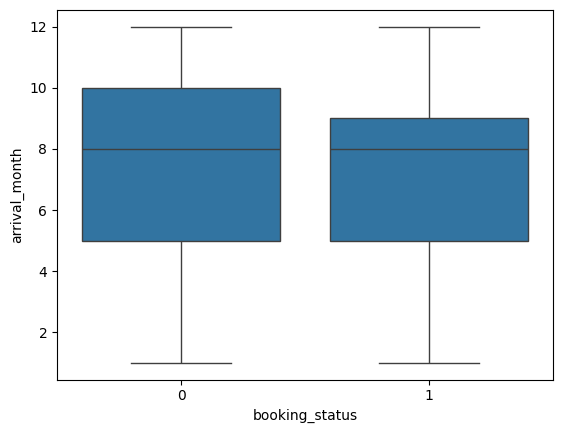

In [12]:
sns.boxplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='arrival_month'>

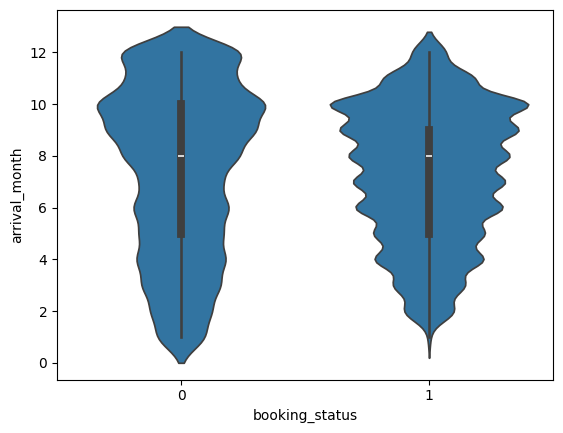

In [13]:
sns.violinplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='lead_time'>

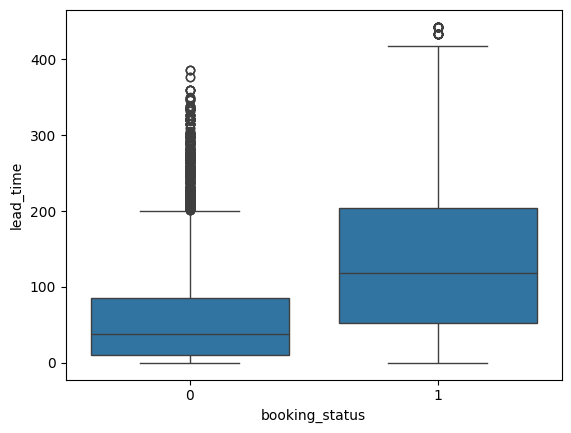

In [14]:
sns.boxplot(X_treino, x=y_treino, y='lead_time')

## Vídeo 2.2 - Correlação entre features

In [15]:
correlacao = pd.concat([X_treino,y_treino],axis=1).corr()

In [16]:
import matplotlib.pyplot as plt

<Axes: >

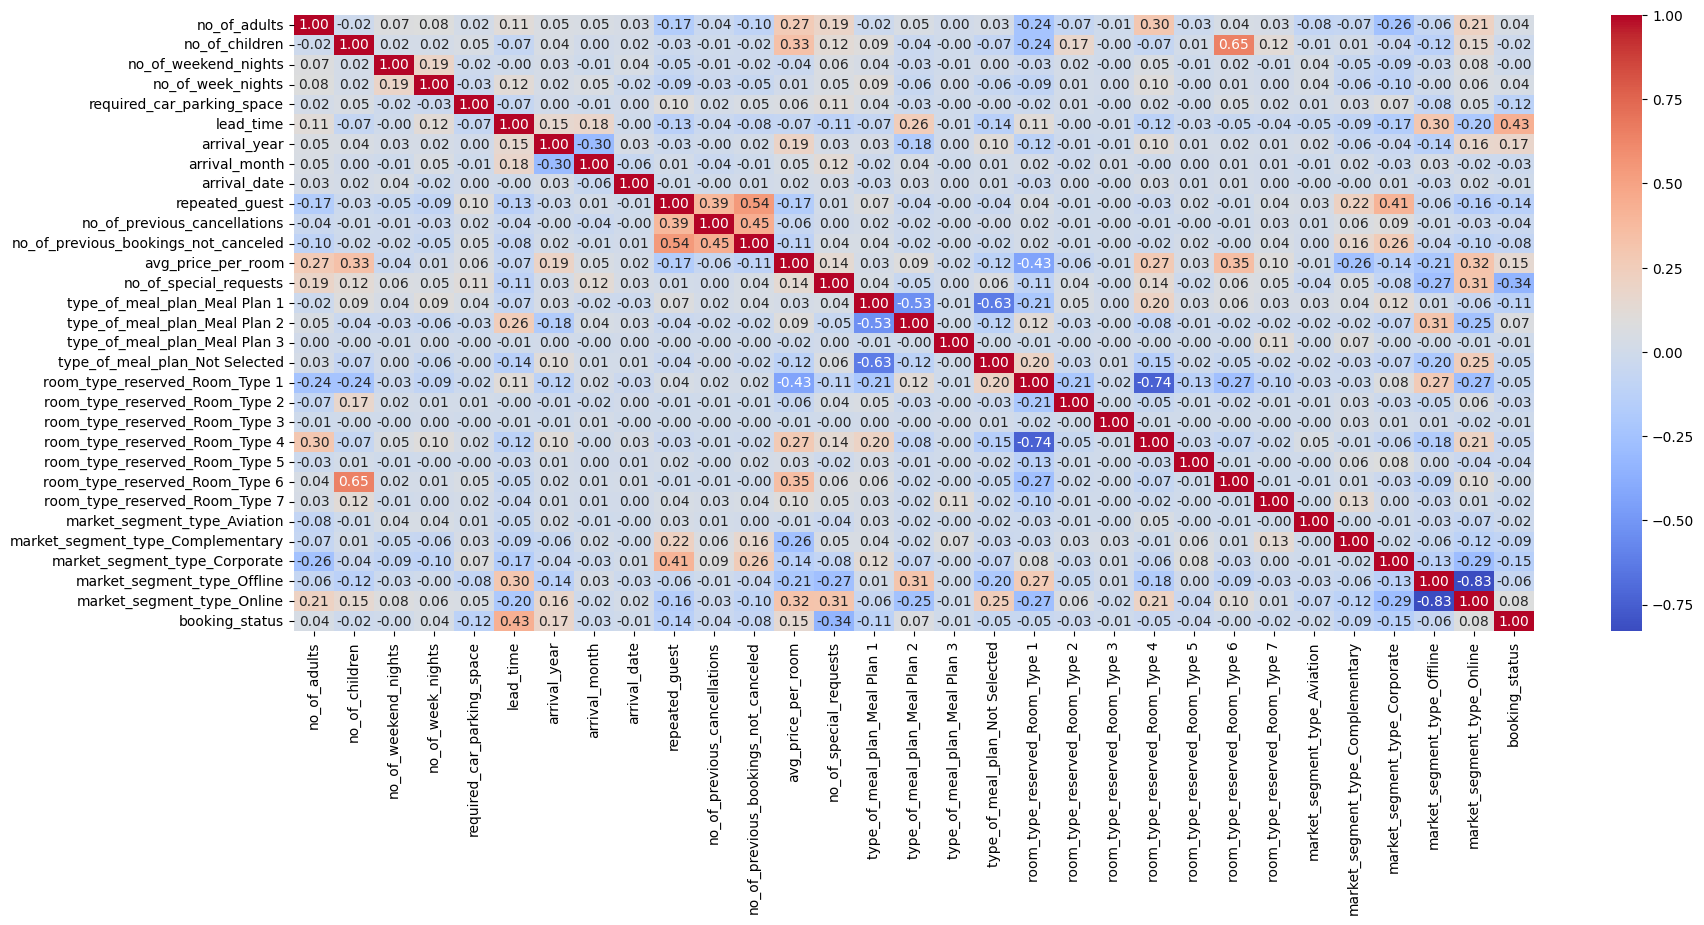

In [17]:
plt.figure(figsize=(20,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm',fmt='.2f')

## Vídeo 2.3 - Feature Importance

In [18]:
modelo = RandomForestClassifier(random_state=2)
modelo.fit(X_treino,y_treino)

RandomForestClassifier(random_state=2)

In [19]:
modelo.feature_importances_

array([2.24533588e-02, 5.74179351e-03, 3.17549138e-02, 4.73535010e-02,
       8.56661469e-03, 2.83828346e-01, 2.36090084e-02, 8.55979884e-02,
       8.23939284e-02, 4.19694499e-03, 4.64355673e-04, 2.68056078e-03,
       1.37017865e-01, 1.37129856e-01, 1.50643354e-02, 9.81369588e-03,
       9.40519723e-06, 1.00358358e-02, 9.71973107e-03, 2.63968029e-03,
       5.78834536e-05, 7.79609257e-03, 2.21700197e-03, 1.50837806e-03,
       4.10442195e-04, 8.23193388e-04, 2.07244064e-03, 1.23178537e-02,
       2.97493187e-02, 2.29756754e-02])

In [20]:
importancia = pd.DataFrame({'colunas':X_treino.columns,'importancia':modelo.feature_importances_})
importancia

,colunas,importancia
0,no_of_adults,0.022453
1,no_of_children,0.005742
2,no_of_weekend_nights,0.031755
3,no_of_week_nights,0.047354
4,required_car_parking_space,0.008567
5,lead_time,0.283828
6,arrival_year,0.023609
7,arrival_month,0.085598
8,arrival_date,0.082394
9,repeated_guest,0.004197


In [21]:
importancia10 = importancia.sort_values(by="importancia", ascending=False).head(10)
importancia10

,colunas,importancia
5,lead_time,0.283828
13,no_of_special_requests,0.137130
12,avg_price_per_room,0.137018
7,arrival_month,0.085598
8,arrival_date,0.082394
3,no_of_week_nights,0.047354
2,no_of_weekend_nights,0.031755
28,market_segment_type_Offline,0.029749
6,arrival_year,0.023609
29,market_segment_type_Online,0.022976


<ipython-input-22-807bea707d29>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75);


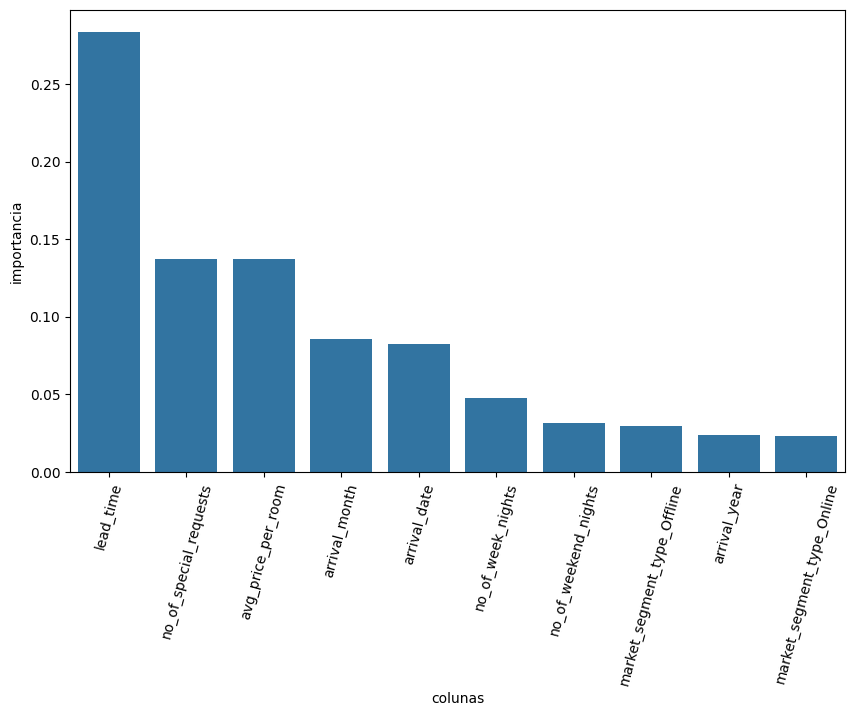

In [22]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='colunas',y='importancia',data=importancia10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

# Aula 3 - Automatizando a seleção

## Vídeo 3.1 - SelectFromModel

In [23]:
from sklearn.feature_selection import SelectFromModel

In [24]:
modelo_fselecionadas = SelectFromModel(modelo, max_features=10, prefit=True)

In [25]:
X_treino_selecionado = modelo_fselecionadas.transform(X_treino);
X_teste_selecionado = modelo_fselecionadas.transform(X_teste);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [26]:
modelo = RandomForestClassifier(random_state=2)
modelo.fit(X_treino_selecionado,y_treino)
print(f'Score: {modelo.score(X_teste_selecionado,y_teste)}')

Score: 0.8976962124170246


## Vídeo 3.2 - Validação cruzada

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
modelo = RandomForestClassifier(random_state=2)

In [29]:
parametros_busca = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [30]:
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros_busca,
                           scoring='accuracy', cv=5, n_jobs=-1)

In [31]:
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

Ou utilizar direto o melhor estimador na SelectFromModel.

In [32]:
modelo_fselecionadas = SelectFromModel(grid_search.best_estimator_, max_features=10,prefit=True)


In [33]:
X_treino_selecionado = modelo_fselecionadas.transform(X_treino)
X_teste_selecionado = modelo_fselecionadas.transform(X_teste)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [34]:
modelo = grid_search.best_estimator_
modelo.fit(X_treino_selecionado, y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

In [35]:
score = modelo.score(X_teste_selecionado, y_teste)
print(f'Score: {score}')

Score: 0.8973057399453338


## Vídeo 3.3 - Matriz de confusão

In [36]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [37]:
y_pred = modelo.predict(X_teste_selecionado)

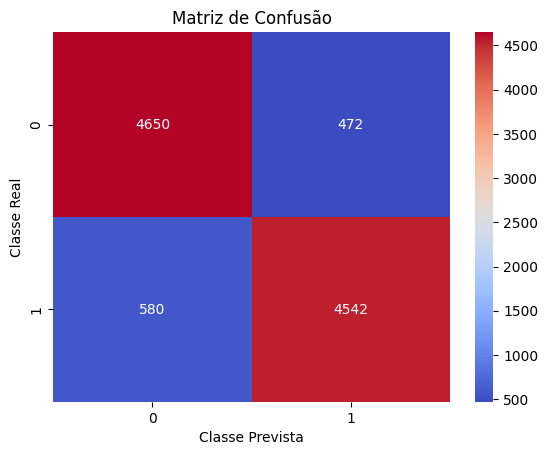

In [38]:
matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm',fmt='d')
plt.xlabel('Classe Prevista');
plt.ylabel('Classe Real');
plt.title('Matriz de Confusão');

Outro método de análise que podemos usar é a curva roc.

In [39]:
fpr, tpr, thresholds = roc_curve(y_teste,y_pred)

In [40]:
roc_auc = auc(fpr, tpr)

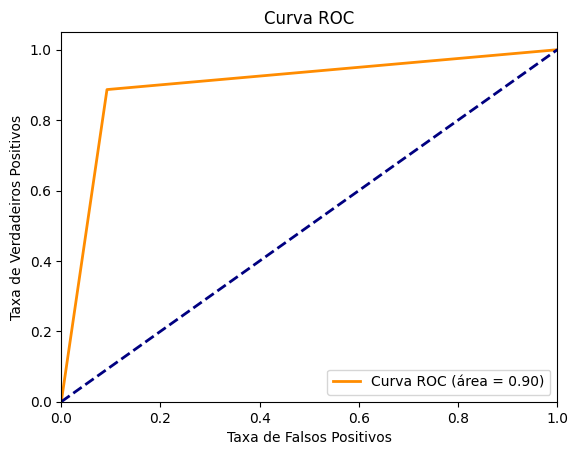

In [41]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Aula 4 - Avaliação dos resultados

## Vídeo 4.1 - Seleção com RFE

In [42]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [43]:
parametros = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'random_state': 2
}

In [44]:
modelo = RandomForestClassifier(**parametros)

In [45]:
from sklearn.feature_selection import RFE

In [46]:
selecionador = RFE(modelo,n_features_to_select=10, step=1)
selecionador.fit(X_treino, y_treino)

RFE(estimator=RandomForestClassifier(n_estimators=300, random_state=2),
    n_features_to_select=10)

In [47]:
X_treino_selecionado = selecionador.transform(X_treino)
X_teste_selecionado = selecionador.transform(X_teste)

In [48]:
modelo.fit(X_treino_selecionado,y_treino)
print(f'Score: {modelo.score(X_teste_selecionado,y_teste)}')

Score: 0.9126317844591956


In [49]:
y_pred = modelo.predict(X_teste_selecionado)

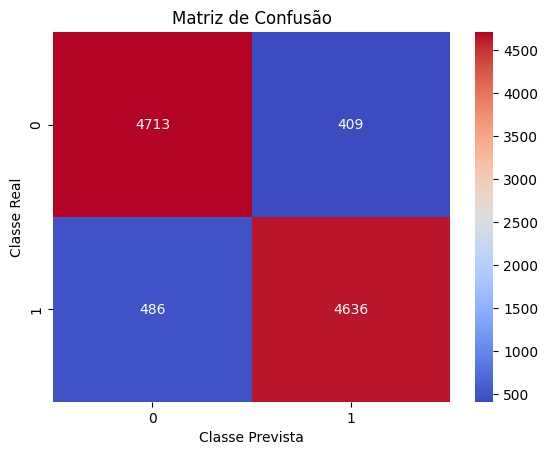

In [50]:
matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm',fmt='d')
plt.xlabel('Classe Prevista');
plt.ylabel('Classe Real');
plt.title('Matriz de Confusão');

## Vídeo 4.2 - Seleção com RFECV

In [51]:
modelo = RandomForestClassifier(**parametros)

In [52]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Aqui vamos definir o StratifiedKFold para ser o método de divisão dos dados.

In [53]:
cv = StratifiedKFold(5,shuffle=True,random_state=500)
rfecv = RFECV(
    estimator=modelo,
    step=1,
    cv=cv,
    scoring='roc_auc', #roc_auc
    min_features_to_select=1,
    importance_getter='auto'
)

In [54]:
rfecv.fit(X_treino,y_treino)
print(f'O número ideal de features é: {rfecv.n_features_}')
print(f'Ranking das features: {rfecv.ranking_}')
print(f'Score: {rfecv.cv_results_}')

O número ideal de features é: 25
Ranking das features: [1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 6 1 1 1 5 1 1 1 4 2 1 1 1 1]
Score: {'mean_test_score': array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734]), 'std_test_score': array([0.02230485, 0.00513526, 0.00256538, 0.00215576, 0.00235998,
       0.00214142, 0.00143015, 0.00134581, 0.0012676 , 0.00140743,
       0.001545  , 0.00160935, 0.00118657, 0.00139523, 0.00150719,
       0.00162719, 0.00170077, 0.00154041, 0.00171934, 0.00164235,
       0.00144254, 0.00143644, 0.00120112, 0.00121457, 0.00127118,
       0.00121897, 0.00149984, 0.00099933, 0.00123228, 0.00116114]), 'split0_test_score': array([0.

In [55]:
y_pred = rfecv.predict(X_teste)

<Axes: >

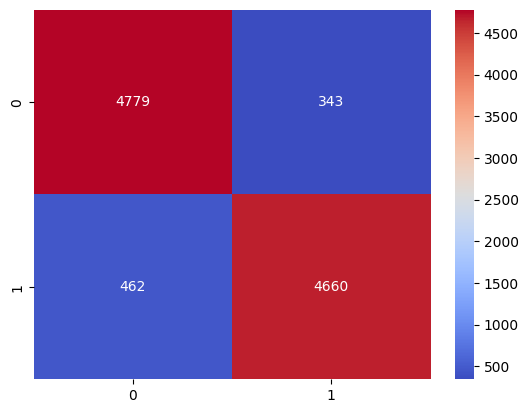

In [56]:
matriz_confusao = confusion_matrix(y_teste,y_pred)
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm',fmt='d')

## Vídeo 4.3 - Visualização dos resultados

In [57]:
resultado = rfecv.cv_results_

In [58]:
resultado['mean_test_score']

array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734])

In [59]:
results_df = pd.DataFrame({'Valores': resultado['mean_test_score']})

<ipython-input-60-f3495dc2b3fd>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


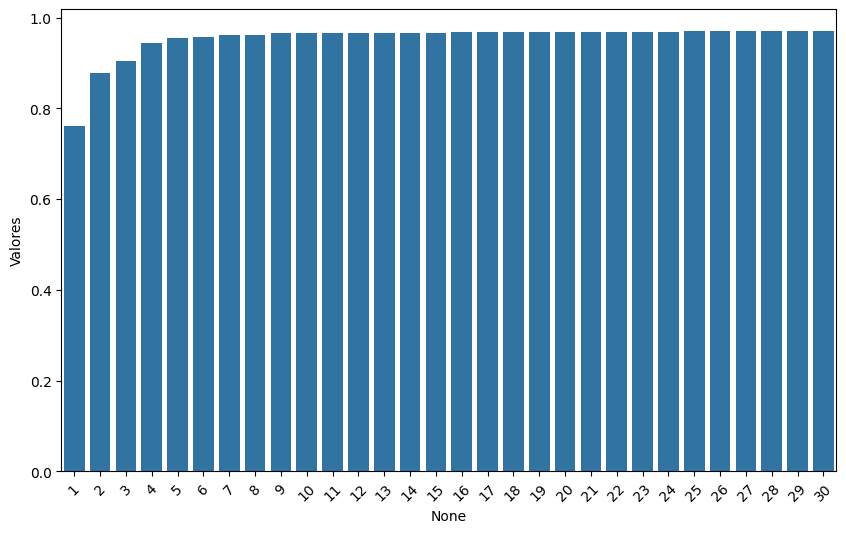

In [60]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=results_df.index +1 , y='Valores',data=results_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [61]:
resultado['mean_test_score'][27]

0.9698847880654794